In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# logistic Regression Basic 

$$\hat{y}= {h_\theta(x)} = \frac{1}{1+e^{-wx+b}}$$
the above equation is the logistic regression model, where w is the weight, b is the bias, and x is the input. 
The logistic regression model is a linear model with a sigmoid activation function.

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

# Error Function (Cross Entropy Loss)
$$J_(w,b_) = {j(\theta)} = \frac{1}{N} \sum_{i=1}^{n}[y^ilog(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$

# Gradient Descent 
$$w = w - \alpha \frac{\partial J_(w,b_)}{\partial w}$$
$$b = b - \alpha \frac{\partial J_(w,b_)}{\partial b}$$

# Derivative of the Error Function
$$\frac{\partial J_(w,b_)}{\partial w} = \frac{1}{N} \sum_{i=1}^{n} (h_\theta(x^i)-y^i)x^i$$

$$\frac{\partial J_(w,b_)}{\partial b} = \frac{1}{N} \sum_{i=1}^{n} (h_\theta(x^i)-y^i)$$

# Gradient Descent Update Rule
$$w = w - \alpha \frac{1}{N} \sum_{i=1}^{n} (h_\theta(x^i)-y^i)x^i$$
$$b = b - \alpha \frac{1}{N} \sum_{i=1}^{n} (h_\theta(x^i)-y^i)$$

# sigmoid graph 

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

## Algorithm 
1. Initialize the weight and bias with random values.
2. Calculate the predicted value using the logistic regression model.
3. Calculate the error using the cross-entropy loss function.
4. Calculate the gradient of the error function.
5. Update the weight and bias using the gradient descent update rule.
6. Repeat steps 2-5 until the error is minimized.



In [2]:
class LogisticRegression:
    def __init__(self,lr=0.01,n_iters=1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None 

    def _sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X,self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self,X):
        linear_model = np.dot(X,self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

/tmp/ipykernel_378423/4215935510.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


LR classification accuracy: 0.9210526315789473


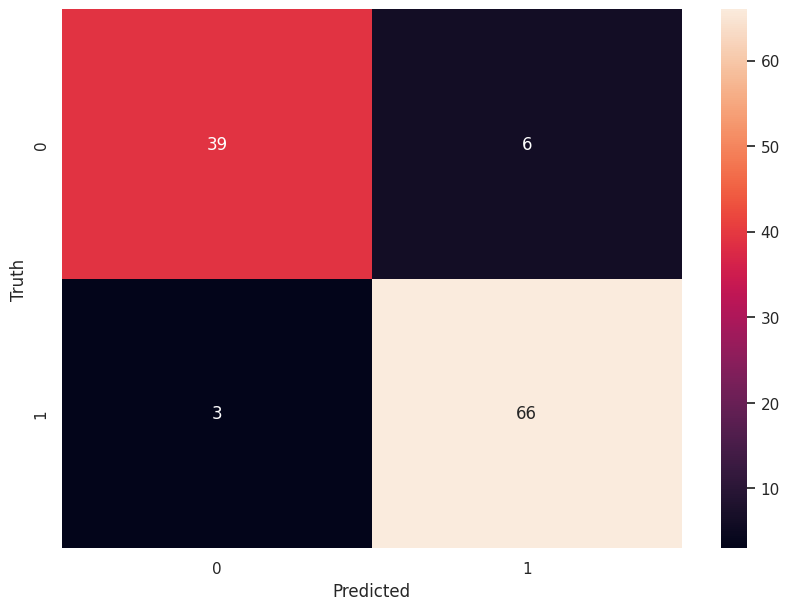

/tmp/ipykernel_378423/4215935510.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


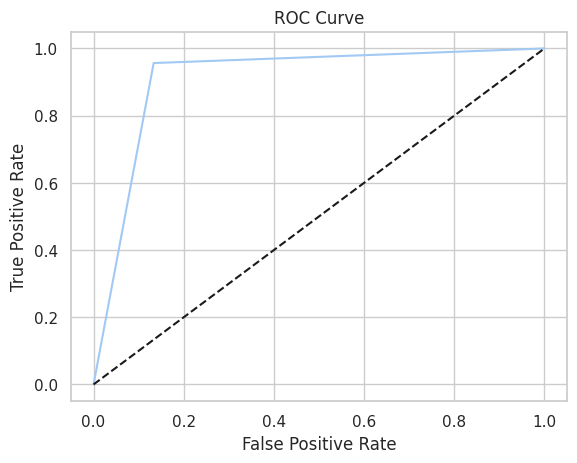

In [7]:
bc = datasets.load_breast_cancer()
X,y = bc.data,bc.target 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)



regressor = LogisticRegression(lr=0.01,n_iters=1000)
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)

def accuracy(predictions,y_test):
    accuracy = np.sum(predictions== y_test) / len(y_test)
    return accuracy

print(f"LR classification accuracy: {accuracy(y_test,predictions)}")

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


#plotting the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = regressor.predict(X_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



